## Practical example: Cardiac disease modeling with logistic regression

### The CHDAGE dataset

For the first simple example, we will use a very simple and studied datased, first know for being published in the book Applied Logistic Regression, from David W. Hosmer, Jr.; Stanley Lemeshow; Rodney X. Sturdivant.
lists the age in years (AGE), and presence or absence of evidence of significant coronary heart disease (CHD) for 100 subjects in a hypothetical study of risk factors for heart disease. The table also contains an identifier variable (ID) and an age group variable (AGEGRP). The outcome variable is CHD, which is coded with a value of “0” to indicate that CHD is absent, or “1” to indicate that it is present in the individual. In general, any two values could be used, but we have found it most convenient to use zero and one. We refer to this data set as the CHDAGE data.

### CHDAGE dataset format

The CHDAGE dataset is a 2 column CSV file, that we will download from an external repository.
In the first chapter, we used native TensorFlow methods for the reading of the dataset. In this chapter we will alternatively use a complementary and popular library to get the data.
The causes for this new addition, is that, given that the dataset only has 100 tuples, it is practical to just have to read it in one line, and also we get simple but powerful analysis methods for free, provided by the pandas library

The first stage of this project, we will start loading an instance of the CHDAGE dataset, then we will print vital statistics about the data, and then proceed to  preprocessing.
After doing some plots of the data, we will build a model, composed of the activation function, which will be a softmax function, for the special case where it becomes a standard logistic regression, that is when there are only 2 classes (Existence or not of the illness)

Let's start by importing the needed libraries:


In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn import linear_model
import seaborn.apionly as sns
%matplotlib inline
import matplotlib.pyplot as plt
sns.set(style='whitegrid', context='notebook')


/anaconda3/lib/python3.6/site-packages/seaborn/apionly.py:6: UserWarning: As seaborn no longer sets a default style on import, the seaborn.apionly module is deprecated. It will be removed in a future version.
  warnings.warn(msg, UserWarning)


Let's read the dataset, from the csv oriinal file, using pandas read_csv, and draw the data distribution using the scatter function of Matplotlib.
As we can see, there is a definite pattern through the years which favour the presence of cardiac disease as the age increments.

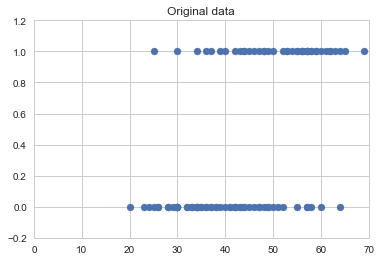

In [2]:
df = pd.read_csv("data/CHD.csv", header=0)
plt.figure() # Create a new figure
plt.axis ([0,70,-0.2,1.2])
plt.title('Original data')
plt.scatter(df['age'],df['chd']) #Plot a scatter draw of the random datapoints

Now we will create a logistic regression model, using the LogisticRegression objet from sklear, and then we will call the fit function, wich will create a sigmoid optimized to minimize the prediction error for our train data.

In [3]:
logistic = linear_model.LogisticRegression(C=1e5)
logistic.fit(df['age'].reshape(100,1),df['chd'].reshape(100,1))

AttributeError: 'Series' object has no attribute 'reshape'

Now it's time to represent the results. Here we will generate a linear space from 10 to 90years, with 100 subdivitions, and will, foa each sample of the domain, the probability for 1, also the probability for 0 (simply the inverse of the previous one), the predictions, and the original data points, so we can match everything in a single graphic

In [4]:
x_plot = np.linspace(10, 90, 100)
oneprob=[]
zeroprob=[]
predict=[]
plt.figure(figsize=(10,10))
for i in x_plot:
    oneprob.append (logistic.predict_proba(i)[0][1]);
    zeroprob.append (logistic.predict_proba(i)[0][0]);
    predict.append (logistic.predict(i)[0]);

plt.plot(x_plot, oneprob);
plt.plot(x_plot, zeroprob)
plt.plot(x_plot, predict);
plt.scatter(df['age'],df['chd'])

NotFittedError: Call fit before prediction

<Figure size 720x720 with 0 Axes>